In [1]:
import pandas as pd
import seaborn as sns
sns.set()
import numpy as np
import matplotlib.pyplot as plt

# Notes
daniel robertson is twice- coudl add later

In [2]:
roster = pd.read_csv('./Data/roster.csv')
lineup = pd.DataFrame()
lineup['Pos'] = ['C', '1B', '2B', '3B', 'SS', 'OF', 'DH']
lineup['Num'] =   [1,   1.5,    1.5,    1.5  ,  1.5  , 5,   1]

In [3]:
lineup

,Pos,Num
0,C,1.0
1,1B,1.5
2,2B,1.5
3,3B,1.5
4,SS,1.5
5,OF,5.0
6,DH,1.0


In [4]:
roster

,POSITION,STARTERS,MAXIMUM
0,Catcher (C),1,No Limit
1,First Base (1B),1,No Limit
2,Second Base (2B),1,No Limit
3,Third Base (3B),1,No Limit
4,Shortstop (SS),1,No Limit
5,Middle Infielder (2B/SS),1,NaN
6,Corner Infielder (1B/3B),1,NaN
7,Left Field (LF),0,No Limit
8,Center Field (CF),0,No Limit
9,Right Field (RF),0,No Limit


In [229]:
scoring_off = pd.read_csv('./Data/scoring_off.csv')
scoring_pitch = pd.read_csv('./Data/scoring_pitch.csv')

# adding stat abbrevs
scoring_off['STAT'] = ['TB', 'BB', 'R', 'RBI', 'SB', 'SO']
scoring_pitch['STAT'] = ['IP', 'ER', 'W', 'L', 'SV', 'K', 'H', 'BB']
#scoring_pitch['STAT'] = ['IP', 'ER', 'W', 'L', 'SV', 'K', 'H', 'BB', 'HLD']

scoring_stats_pitch = scoring_pitch.STAT
scoring_stats_off = scoring_off.STAT

scoring_stats_updated_off = ['Name', 'Pos','Score','G', 'Score/G','TB', 'BB', 'R', 'RBI', 'SB', 'SO']
scoring_stats_updated_pitching = ['Score', 'HR','IP', 'ER', 'W', 'L', 'SV', 'SO', 'H', 'BB']

In [6]:
scoring_pitch

,Statistic,Score,STAT
0,Innings Pitched (IP),3,IP
1,Earned Runs (ER),-2,ER
2,Wins (W),5,W
3,Losses (L),-5,L
4,Saves (SV),5,SV
5,Strikeouts (K),1,K
6,Hits Allowed (H),-1,H
7,Walks Issued (BB),-1,BB


In [7]:
ronald_acuna_input = {'mlb_name': 'Ronald Acuna', 
                   'mlb_pos': 'OF', 
                   'mlb_team': 'ATL', 
                   'mlb_team_long': 'Atlanta Braves',
                   'bats': 'R', 
                   'throws': 'R',
                   'birth_year': 1997, 
                   'bp_id': 0, 
                   'bref_id': 'acunaro01', 
                   'bref_name': 'Ronald Acuna', 
                   'cbs_id': 0, 
                   'cbs_name': 0,
                   'cbs_pos': 0, 
                   'espn_id': 36185 , 
                   'espn_name': 'Ronald Acuna', 
                   'espn_pos': 'OF', 
                   'fg_id': 'sa877503', 
                   'fg_name': 'Ronald Acuna',
                   'fg_pos': 'OF', 
                   'lahman_id': 0, 
                   'nfbc_id': 0, 
                   'nfbc_name': 0, 
                   'nfbc_pos': 0, 
                   'retro_id': 0,
                   'retro_name': 0, 
                   'debut': 0, 
                   'yahoo_id': 0, 
                   'yahoo_name': 0, 
                   'yahoo_pos': 0,
                   'mlb_depth': 0, 
                   'ottoneu_id': 0, 
                   'ottoneu_name': 0, 
                   'ottoneu_pos': 0, 
                   'rotowire_id': 0,
                   'rotowire_name': 0, 
                   'rotowire_pos': 0
                  }

In [8]:
shohei_ohtani_input = {'mlb_name': 'Shohei Ohtani', 
                   'mlb_pos': 'SP', 
                   'mlb_team': 'LAA', 
                   'mlb_team_long': 'Los Angeles Angels',
                   'bats': 'L', 
                   'throws': 'R',
                   'birth_year': 1994, 
                   'bp_id': 0, 
                   'bref_id': 'ohtansh01', 
                   'bref_name': 'Shohei Ohtani', 
                   'cbs_id': 0, 
                   'cbs_name': 0,
                   'cbs_pos': 0, 
                   'espn_id': 39832 , 
                   'espn_name': 'Shohei Ohtani', 
                   'espn_pos': 'SP', 
                   'fg_id': '19755', 
                   'fg_name': 'Shohei Ohtani',
                   'fg_pos': 'SP', 
                   'lahman_id': 0, 
                   'nfbc_id': 0, 
                   'nfbc_name': 0, 
                   'nfbc_pos': 0, 
                   'retro_id': 0,
                   'retro_name': 0, 
                   'debut': 0, 
                   'yahoo_id': 0, 
                   'yahoo_name': 0, 
                   'yahoo_pos': 0,
                   'mlb_depth': 0, 
                   'ottoneu_id': 0, 
                   'ottoneu_name': 0, 
                   'ottoneu_pos': 0, 
                   'rotowire_id': 0,
                   'rotowire_name': 'Shohei Ohtani', 
                   'rotowire_pos': 0
                  }

In [1003]:
# creating master ref that brings in all players
master_ref = pd.read_csv('./Data/master.csv', encoding='latin-1')

# setting values for mismatchd names
master_ref = master_ref.set_index('mlb_name')
master_ref = master_ref.set_value(index='Jacob Faria', col='espn_name', value='Jacob Faria')
master_ref = master_ref.set_value(index='Jacob Faria', col='fg_name', value='Jacob Faria')
master_ref = master_ref.set_value(index='Lance McCullers', col='espn_name', value='Lance McCullers Jr.')
master_ref = master_ref.set_value(index='Lance McCullers', col='fg_name', value='Lance McCullers Jr.')
master_ref = master_ref.set_value(index='Steven Souza Jr.', col='espn_name', value='Steven Souza Jr.')
master_ref = master_ref.set_value(index='Nick Castellanos', col='fg_name', value='Nicholas Castellanos')
master_ref = master_ref.set_value(index='Yulieski Gurriel', col='fg_name', value='Yuli Gurriel')

master_ref = master_ref.reset_index()

# matt duffy dup, fix greg(ory) bird
master_ref = master_ref.set_index('bref_id')
master_ref = master_ref.set_value(index='duffyma02', col='espn_name', value='Matt Duffy-2')
master_ref = master_ref.set_value(index='birdgr01', col='fg_name', value='Greg Bird')
master_ref = master_ref.set_value(index='birdgr01', col='mlb_name', value='Greg Bird')

master_ref = master_ref.reset_index()


# adding players who do not exist in master ref
master_ref = master_ref.append(ronald_acuna_input, ignore_index=True)
master_ref = master_ref.append(shohei_ohtani_input, ignore_index=True)
master_ref.tail()

,bref_id,mlb_name,mlb_id,mlb_pos,mlb_team,mlb_team_long,bats,throws,birth_year,bp_id,...,yahoo_id,yahoo_name,yahoo_pos,mlb_depth,ottoneu_id,ottoneu_name,ottoneu_pos,rotowire_id,rotowire_name,rotowire_pos
2677,spruize01,Zeke Spruill,543809.0,P,BOS,Boston Red Sox,R,R,1989,58696,...,9439.0,Zeke Spruill,RP/SP,NaN,16606.0,Zeke Spruill,RP,10522.0,Zeke Spruill,P
2678,wheelze01,Zelous Wheeler,519412.0,3B,NYY,New York Yankees,R,R,1987,56964,...,9755.0,Zelous Wheeler,3B/RF,NaN,5189.0,Zelous Wheeler,Util,NaN,NaN,NaN
2679,almonzo01,Zoilo Almonte,501660.0,LF,ATL,Atlanta Braves,S,R,1989,50911,...,9436.0,Zoilo Almonte,LF,NaN,9387.0,Zoilo Almonte,OF,12338.0,Zoilo Almonte,OF
2680,acunaro01,Ronald Acuna,NaN,OF,ATL,Atlanta Braves,R,R,1997,0,...,0.0,0,0,0,0.0,0,0,0.0,0,0
2681,ohtansh01,Shohei Ohtani,NaN,SP,LAA,Los Angeles Angels,L,R,1994,0,...,0.0,0,0,0,0.0,0,0,0.0,Shohei Ohtani,0


In [1004]:
# error checker
# master_ref.set_index('fg_name').loc['Yulieski Gurriel']

In [12]:
# grabbing 2017 stats to add to lahman db
# can be read in from csv file later

roto = pd.read_csv('./Data/2017_roto_stats')

# fix column name whitspace
roto.columns = roto.columns.str.strip()
# deal w/ people who played for multiple teams # future- add team most games played w/
roto = roto.groupby('Name').sum().reset_index()

# Names are Last, First. Need First Last
def name_switch(text):
    split = text.strip()
    split = text.split('- ')
    return ("{0} {1}".format(split[1], split[0]))

# Apply name switch
roto.Name = roto.Name.apply(name_switch)

# Add lahman_name to roto db
def roto_to_lahman(name):
    df = master_ref.set_index('rotowire_name')
    try:
        return df.loc[name].lahman_id
    except:
        #print("Error: ",name)
        return 0

def roto_to_positiom(name):
    df = master_ref.set_index('rotowire_name')
    try:
        return str(df.loc[name].espn_pos).split(' \ ')[0]
    except:
        #print("Error: ",name)
        return 0
    
# adding lahman
roto['lehman_id'] = roto.Name.apply(roto_to_lahman) # issues w/ dup
roto['Pos'] = roto.Name.apply(roto_to_positiom) 

#issues: names
roto = roto.set_index('Name').set_value(index= 'Rey Fuentes', col='lehman_id',value='fuentre01').reset_index()
roto = roto.set_index('Name').set_value(index= 'Cameron Gallagher', col='lehman_id',value='gallaca01').reset_index()
roto = roto.set_index('Name').set_value(index= 'Zack Granite', col='lehman_id',value='graniza01').reset_index()
roto = roto.set_index('Name').set_value(index= 'Raffy Lopez', col='lehman_id',value='lopezra02').reset_index()
roto = roto.set_index('Name').set_value(index= 'Mike Morse', col='lehman_id',value='morsemi01').reset_index()
roto = roto.set_index('Name').set_value(index= 'Kris Negron', col='lehman_id',value='negrokr01').reset_index()
roto = roto.set_index('Name').set_value(index= 'Michael Ohlman', col='lehman_id',value='ohlmami01').reset_index()
roto = roto.set_index('Name').set_value(index= 'Dwight Smith', col='lehman_id',value='smithdw02').reset_index()
roto = roto.set_index('Name').set_value(index= 'Yolmer Sanchez', col='lehman_id',value='sanchca01').reset_index()
roto = roto.set_index('Name').set_value(index= 'Stuart Turner', col='lehman_id',value='turnest01').reset_index()

# duplicated names/duplicated positions
roto = roto.set_index('Name').set_value(index= 'Jose Ramirez', col='lehman_id',value='ramirjo01').reset_index()
roto = roto.set_index('Name').set_value(index= 'Jose Ramirez', col='Pos',value='3B').reset_index()
roto = roto.set_index('Name').set_value(index= 'Matt Reynolds', col='lehman_id',value='reynoma03').reset_index()
roto = roto.set_index('Name').set_value(index= 'Matt Reynolds', col='Pos',value='SS').reset_index()
roto = roto.set_index('Name').set_value(index= 'Michael Taylor', col='lehman_id',value='taylomi02').reset_index()
roto = roto.set_index('Name').set_value(index= 'Michael Taylor', col='Pos',value='RF').reset_index()

# need to drop daniel robertson. there are two players and fuck it
roto = roto.set_index('Name').drop(['Daniel Robertson']).reset_index()
roto = roto.set_index('Name').set_value(index= 'Chris Young', col='lehman_id',value='youngch04').reset_index()
roto = roto.set_index('Name').set_value(index= 'Chris Young', col='Pos',value='LF').reset_index()


# add year, singles column
roto['yearID'] = 2017
roto['1B'] = roto['H'] - roto['HR'] - roto['3B'] - roto['2B']

# error check
error_list = []
for num, x in enumerate(roto.lehman_id):
    try:
        if len(x) < 7:
            error_list.append(['duplicated',num, x, len(x)])
    except:
        error_list.append(['na', num,x])

if len(error_list) < 1:
    print('no errors, outputting to csv')
    #roto.to_csv('./Data/batting_lahman_2017')
else:
    error_list

no errors, outputting to csv


In [ ]:
# reading in
roto = pd.read_csv('./Data/batting_lahman_2017')

In [14]:
# adding batting_df

batting_df = pd.read_csv('./Data/baseballdatabank-2017.1/core/Batting.csv')
# set year limit
batting_df = batting_df[batting_df.yearID > 2014]
# cut out stints- equalize over year
batting_df = batting_df.groupby(['playerID', 'yearID']).sum().reset_index()
del batting_df['GIDP']
del batting_df['stint']
batting_df= batting_df[['playerID', 'yearID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI',
       'SB', 'CS', 'BB', 'SO', 'SH', 'SF','HBP' ]]

batting_df.head()

,playerID,yearID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,SH,SF,HBP
0,aardsda01,2015,33,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0
1,abadfe01,2015,62,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2,abadfe01,2016,57,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0
3,abreujo02,2015,154,613,88,178,34,3,30,101.0,0.0,0.0,39,140.0,0.0,1.0,15.0
4,abreujo02,2016,159,624,67,183,32,1,25,100.0,0.0,2.0,47,125.0,0.0,9.0,15.0


In [15]:
# putting together, adding TB
# adding names to batting_df, matching indexes
temp_df = batting_df.set_index('playerID').join(roto.set_index('lehman_id')[['Name', 'Pos']]).dropna()
# roto df


fantasy_hitters = pd.concat([roto.set_index('lehman_id'), temp_df])

fantasy_hitters['TB'] = fantasy_hitters.H + (fantasy_hitters['2B']) + (2 * fantasy_hitters['3B']) + (3 * fantasy_hitters['HR'])

# Adding Score
fantasy_hitters['Score'] = fantasy_hitters.TB + fantasy_hitters.BB + fantasy_hitters.R + ( # continued
fantasy_hitters.RBI + fantasy_hitters.SB - fantasy_hitters.SO)

fantasy_hitters['Score/G'] = fantasy_hitters['Score'] / fantasy_hitters['G']

#fantasy_hitters.to_csv('./Data/fantasy_hitters')
# fantasty_hitters = pd.read_csv('./Data/fantasy_hitters)

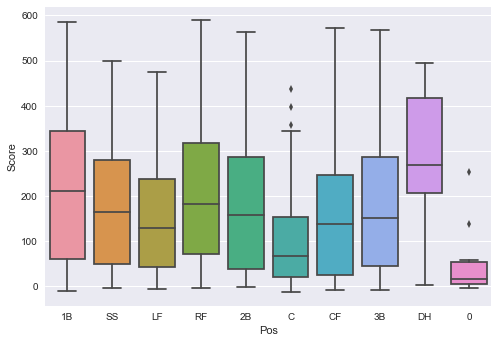

In [16]:
_ = sns.boxplot(x='Pos', y='Score', data=fantasy_hitters)
plt.show()

In [103]:
scoring_stats_off

fantasy_hitters_2017 = fantasy_hitters[fantasy_hitters.yearID == 2017].set_index('Name')
fantasy_hitters_2017 = fantasy_hitters_2017[fantasy_hitters_2017.G > 30]
fantasy_hitters_2017.sort_values('Score/G', ascending=False)[scoring_stats_off].head()

,TB,BB,R,RBI,SB,SO
Name,,,,,,
Mike Trout,253,94,92,72.0,22.0,90.0
Rhys Hoskins,105,37,37,48.0,2.0,46.0
Bryce Harper,250,68,95,87.0,4.0,99.0
Joey Votto,323,134,106,100.0,5.0,83.0
Charlie Blackmon,387,65,137,104.0,14.0,135.0


In [20]:
# top 10 per position for 2017
#fantasy_hitters_2017.sort_values('Score/G', ascending=False)[view]
for pos in fantasy_hitters_2017.Pos.unique():
    df = fantasy_hitters_2017[fantasy_hitters_2017.Pos == pos]
    top = df.sort_values('Score/G', ascending=False)[view]
    #print(pos, top)

In [21]:
# Pitching - it works - dont question
# grabbing 2017 stats to add to lahman db

roto_pitch = pd.read_csv('./Data/pitching_2017.csv')

# deal w/ people who played for multiple teams # future- add team most games played w/
roto_pitch = roto_pitch.groupby('Name').sum().reset_index()

# Names are Last, First. Need First Last
def name_switch(text):
    split = text.strip()
    split = text.split('- ')
    return ("{0} {1}".format(split[1], split[0]))

# Apply name switch
roto_pitch.Name = roto_pitch.Name.apply(name_switch)

# get a list of just 'Name' and 'lehman_id'
roto_pitch_lahman = roto_pitch.set_index('Name').join(master_ref.set_index('rotowire_name')[['lahman_id']])['lahman_id']

# Add lahman_name to roto db
def roto_to_lahman_pitch(name):
    try:
        return roto_pitch_lahman.loc[name]
    except:
        #print("Error: ",name)
        return 0

# adding lahman
roto_pitch['lehman_id'] = roto_pitch.Name.apply(roto_to_lahman) # issues w/ dup

#issues: names
roto_pitch = roto_pitch.set_index('Name').set_value(index= 'Paolo Espino', col='lehman_id',value='espinpa01').reset_index()
roto_pitch = roto_pitch.set_index('Name').set_value(index= 'Roberto Gomez', col='lehman_id',value='gomezro01').reset_index()
roto_pitch = roto_pitch.set_index('Name').set_value(index= 'Jacob Rhame', col='lehman_id',value='rhameja01').reset_index()


# duplicated names/duplicated positions # adams both suck - 2 people - comb 30 innings projected
# 2 chris smith, one pitched 55 innings, 1 5 innings
roto_pitch = roto_pitch.set_index('Name').set_value(index= 'Austin Adams', col='lehman_id',value='adamsau01').reset_index()
roto_pitch = roto_pitch.set_index('Name').set_value(index= 'Miguel Gonzalez', col='lehman_id',value='gonzami03').reset_index()
roto_pitch = roto_pitch.set_index('Name').set_value(index= 'Michael Taylor', col='lehman_id',value='taylomi02').reset_index()
roto_pitch = roto_pitch.set_index('Name').set_value(index= 'Luis Perdomo', col='lehman_id',value='perdolu02').reset_index()
roto_pitch = roto_pitch.set_index('Name').set_value(index= 'Jose Ramirez', col='lehman_id',value='ramirjo02').reset_index()
roto_pitch = roto_pitch.set_index('Name').set_value(index= 'Chris Smith', col='lehman_id',value='smithch07').reset_index()
roto_pitch = roto_pitch.set_index('Name').set_value(index= 'Francisco Rodriguez', col='lehman_id',value='rodrifr03').reset_index()
roto_pitch = roto_pitch.set_index('Name').set_value(index= 'Jose Valdez', col='lehman_id',value='valdejo03').reset_index()
roto_pitch = roto_pitch.set_index('Name').set_value(index= 'Chris Young', col='lehman_id',value='youngch03').reset_index()




# need to drop daniel robertson. there are two players and fuck it
#roto_pitch = roto_pitch.set_index('Name').drop(['Daniel Robertson']).reset_index()
#roto_pitch = roto_pitch.set_index('Name').set_value(index= 'Chris Young', col='lehman_id',value='youngch04').reset_index()

# add year, singles column
roto_pitch['yearID'] = 2017

# error check
for num, x in enumerate(roto_pitch.lehman_id):
    try:
        if len(x) < 6:
            print('duplicated',num, x, len(x))
    except:
        print('na', num,x)
        
roto_pitch['Score'] = ((roto_pitch['IP'] * 3) + (roto_pitch['ER'] * -2 ) + (roto_pitch['W'] * 5 ) +(roto_pitch['L'] * -5) +(roto_pitch['SV'] * 5) + (roto_pitch['K'] * 1 )+ (roto_pitch['H'] *-1 ) + (roto_pitch['BB'] * -1))

roto_pitch['ScoreHLD'] = ((roto_pitch['IP'] * 3) + (roto_pitch['ER'] * -2 ) + (roto_pitch['W'] * 5 ) +(roto_pitch['L'] * -5) +(roto_pitch['SV'] * 5) + (roto_pitch['HLD'] * 3) +(roto_pitch['K'] * 1 )+ (roto_pitch['H'] *-1 ) + (roto_pitch['BB'] * -1))

In [22]:
roto_pitch.columns

Index(['Name', 'G', 'GS', 'CG', 'SH', 'IP', 'H', 'ER', 'K', 'BB', 'HR', 'W',
       'L', 'SV', 'BS', 'HLD', 'ERA', 'WHIP', 'lehman_id', 'yearID', 'Score',
       'ScoreHLD'],
      dtype='object')

In [23]:
all_pitching = pd.read_csv('./Data/baseballdatabank-2017.1/core/Pitching.csv')

In [24]:
all_pitching.head() # old timers

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


In [25]:
# modernizeing - leave for now doesnt work

df1 = all_pitching[all_pitching.yearID > 2015].groupby(['playerID', 'yearID']).sum().reset_index()
df1.columns
df1['IP'] = df1['IPouts']
df1['K'] = df1['SO']
df1 = df1.set_index(['playerID', 'yearID'])
df1.head()

# come back later
df1 = df1[scoring_stats_pitch].reset_index()
df1.columns = ['Name', 'yearID', 'IP', 'ER', 'W', 'L', 'SV', 'K', 'H', 'BB']
df1['Score'] = ((df1['IP'] * 3) + (df1['ER'] * -2 ) + (df1['W'] * 5 ) +(df1['L'] * -5) +(df1['SV'] * 5) + (df1['K'] * 1 )+ (df1['H'] *-1 ) + (df1['BB'] * -1))
#df1['ScoreHLD'] = 0 # no hold data yet
#df1['ScoreHLD'] = ((df1['IP'] * 3) + (df1['ER'] * -2 ) + (df1['W'] * 5 ) +(df1['L'] * -5) +(df1['SV'] * 5) + (df1['HLD'] * 3) +(df1['K'] * 1 )+ (df1['H'] *-1 ) + (df1['BB'] * -1))

df1 = df1.set_index(['Name', 'yearID', 'Score'])[scoring_stats_pitch]
fantasy_pitching = pd.concat([df1,roto_pitch.set_index(['Name', 'yearID', 'Score'])[scoring_stats_pitch]]).reset_index()
fantasy_pitching.head() # fucked up naming convention

,Name,yearID,Score,IP,ER,W,L,SV,K,H,BB
0,abadfe01,2016,341.0,140.0,19.0,1.0,6.0,1.0,41.0,40.0,22.0
1,achteaj01,2016,277.0,113.0,13.0,1.0,0.0,0.0,14.0,43.0,12.0
2,adamsau01,2016,108.0,55.0,20.0,0.0,0.0,0.0,17.0,27.0,7.0
3,adlemti01,2016,528.0,209.0,31.0,4.0,4.0,0.0,47.0,64.0,20.0
4,alberan01,2016,114.0,51.0,11.0,0.0,0.0,0.0,16.0,27.0,6.0


In [27]:
roto_pitch.head()

,Name,G,GS,CG,SH,IP,H,ER,K,BB,...,L,SV,BS,HLD,ERA,WHIP,lehman_id,yearID,Score,ScoreHLD
0,Fernando Abad,48.0,0.0,0.0,0.0,43.7,40.0,16.0,37.0,14.0,...,1.0,1.0,1.0,2.0,3.30,1.24,abadfe01,2017,92.1,98.1
1,Austin Adams,6.0,0.0,0.0,0.0,5.0,4.0,2.0,10.0,8.0,...,0.0,0.0,0.0,0.0,3.60,2.40,adamsau01,2017,9.0,9.0
2,Tim Adleman,30.0,20.0,0.0,0.0,122.3,124.0,75.0,108.0,51.0,...,11.0,0.0,0.0,2.0,5.52,1.43,adlemti01,2017,119.9,125.9
3,Andrew Albers,9.0,6.0,0.0,0.0,41.0,43.0,16.0,37.0,10.0,...,1.0,1.0,0.0,0.0,3.51,1.29,alberan01,2017,100.0,100.0
4,Matt Albers,63.0,0.0,0.0,0.0,61.0,35.0,11.0,63.0,17.0,...,2.0,2.0,3.0,14.0,1.62,0.85,alberma01,2017,207.0,249.0


# Projections 

In [118]:
def hitter_scoring(df):
    '''return an array of scores'''
    # initalize array
    score_array = []
    spg_array = []
    
    # grab score for each row
    for p_id in df.index:
        row = df.loc[p_id]
        score = 0
        
        # for category, points
        for num, cat in enumerate(scoring_off.STAT):
            score += (np.sum(row[cat] * scoring_off.Score[num]))
       
        # score/game
        spg = round((int(score) / row.G),3)
        # append score to score_array
        score_array.append(score)
        
        spg_array.append(spg)
    
    return score_array, spg_array

In [45]:
# turn LF/CF/RF to OF

def new_pos(pos):
    '''return of if outfielder'''
    if pos == 'LF':
        return('OF')
    elif pos == 'CF':
        return('OF')
    elif pos == 'RF':
        return('OF')
    elif len(str(pos)) > 3:
        return('-')
    else:
        return(pos)

In [121]:
#fangraphs zips projections
fg_2018_df = pd.read_csv('./Data/FanGraphs Leaderboard.csv')

# add TB
fg_2018_df['TB'] = fg_2018_df.H + (fg_2018_df['2B']) + (2 * fg_2018_df['3B']) + (3 * fg_2018_df['HR'])
fg_2018_df['Name'] = fg_2018_df.Name.apply(str.strip)


fg_2018_df['Score'], fg_2018_df['Score/G'] = hitter_scoring(fg_2018_df)

# adding positions. seting index, joining espn_pos, applying new position 
fg_2018_df = fg_2018_df.set_index('Name')
fg_2018_df = fg_2018_df.join(master_ref.set_index('fg_name')['espn_pos'])
fg_2018_df['Pos'] = fg_2018_df.espn_pos.apply(new_pos)
del fg_2018_df['espn_pos']
# setting errors in position to 0 - true rookies mostly. should fix in master ref
fg_2018_df.Pos = fg_2018_df.Pos.fillna(0)

# resetting index
fg_2018_df.index.name = 'Name'
fg_2018_df = fg_2018_df.reset_index()

fg_2018_df.sort_values('Score', ascending=False).head()

,Name,Team,G,PA,AB,H,2B,3B,HR,R,...,wOBA,Fld,BsR,WAR,ADP,playerid,TB,Score,Score/G,Pos
889,Mookie Betts,Red Sox,156,716,641,190,44,5,24,109,...,0.362,17.1,2.8,5.7,7.9,13611,316,537,3.442,OF
918,Nolan Arenado,Rockies,156,667,600,178,41,6,40,100,...,0.384,11.4,-1.0,5.3,4.6,9777,351,532,3.410,3B
878,Mike Trout,Angels,149,653,524,152,30,5,39,114,...,0.416,-2.6,1.8,7.8,1.1,10155,309,527,3.537,OF
655,Jose Altuve,Astros,156,688,622,198,37,4,22,99,...,0.368,-1.9,2.9,5.6,2.2,5417,309,503,3.224,2B
84,Anthony Rizzo,Cubs,150,658,550,152,33,3,33,94,...,0.385,6.1,-0.6,4.5,25.3,3473,290,488,3.253,1B


# now reading in tgf projections

In [120]:
tgf_bat = pd.read_csv('./Data/projections/TG_Fantasy_Baseball_2018_Projections_batters.xls', sep='\t')

# formatting names
def tgf_name_switch(text):
    split = text.strip()
    split = text.split(', ')
    return ("{0} {1}".format(split[1], split[0]))

tgf_bat['Name'] = tgf_bat.Name.apply(tgf_name_switch)

# Adding Total Bases and Strikeouts naming
tgf_bat['TB'] = tgf_bat.H + (tgf_bat['2B']) + (2 * tgf_bat['3B']) + (3 * tgf_bat['HR'])
tgf_bat['SO'] = tgf_bat['K']

# Adding Score, Score/Game
tgf_bat['Score'], tgf_bat['Score/G'] = hitter_scoring(tgf_bat)

tgf_bat.sort_values('Score/G', ascending=False).head()

/Users/joelelster/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars


,Name,Team,Pos,G,AB,H,AVG,R,2B,3B,...,OBP,SLG,OBPS,AL/NL $,Mixed $,Unnamed: 21,TB,SO,Score,Score/G
612,Mike Trout,LAA,OF,157,552,170,0.308,120,33,5,...,0.428,0.592,1.021,$43,$47,NaN,327,135,551,3.510
28,Nolan Arenado,COL,3B,159,612,184,0.301,105,40,6,...,0.362,0.575,0.937,$40,$40,NaN,353,106,545,3.428
55,Mookie Betts,BOS,OF,153,637,183,0.287,106,44,4,...,0.351,0.485,0.836,$33,$34,NaN,310,80,524,3.425
640,Joey Votto,CIN,1B,160,556,178,0.320,102,34,2,...,0.447,0.568,1.015,$27,$32,NaN,315,104,543,3.394
19,Jose Altuve,HOU,2B,156,615,207,0.337,106,40,4,...,0.390,0.520,0.910,$38,$36,NaN,321,76,522,3.346


In [183]:
scoring_stats_off.values

array(['TB', 'BB', 'R', 'RBI', 'SB', 'SO'], dtype=object)

In [589]:
# adding tgf projections to fg projections 
view = ['TB', 'BB', 'R', 'RBI', 'SB', 'SO', 'G']
df1 = tgf_bat.groupby('Name').mean()[view]
df2 = fg_2018_df.groupby('Name').mean()[view]


off_proj = pd.concat([df1, df2]).reset_index()

# taking the mean of the projections
off_proj = off_proj.groupby('Name').mean()
off_proj.index.name = 'Name'

# getting positions
off_proj = off_proj.join(master_ref.set_index('espn_name')['espn_pos'])
off_proj.index.name = 'Name'
off_proj = off_proj.reset_index()
off_proj['Pos'] = off_proj.espn_pos.apply(new_pos)

# need to resolve jose ramirez issue, but dont want to delete shohei
off_proj = off_proj[off_proj.Pos != 'RP']
del off_proj['espn_pos']

# adding scores/g
off_proj['Score'], off_proj['Score/G'] = hitter_scoring(off_proj)

# deleting empty projections 
off_proj = off_proj[off_proj.Score > 10]

# sorting
off_proj = off_proj.sort_values('Score', ascending=False)
off_proj.head()

# still issues with Michael Taylor, Chris Young, Daniel Robertson

/Users/joelelster/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


,Name,TB,BB,R,RBI,SB,SO,G,Pos,Score,Score/G
890,Mike Trout,318.0,114.5,117.0,99.5,25.0,135.0,153.0,OF,539.0,3.523
930,Nolan Arenado,352.0,56.5,102.5,129.0,3.0,104.5,157.5,3B,538.5,3.416
901,Mookie Betts,313.0,64.5,107.5,101.0,26.0,81.5,154.5,OF,530.5,3.430
665,Jose Altuve,315.0,52.5,102.5,84.0,33.5,75.0,156.0,2B,512.5,3.282
624,Joey Votto,287.0,120.5,94.5,92.0,6.5,101.5,152.0,1B,499.0,3.283


In [593]:
off_proj[off_proj.Name.duplicated() == True]

,Name,TB,BB,R,RBI,SB,SO,G,Pos,Score,Score/G
871,Michael Taylor,184.50,32.50,54.5,53.5,20.00,152.0,128.5,OF,193.00,1.502
247,Chris Young,101.00,26.00,32.5,27.0,3.00,58.0,93.0,OF,131.50,1.409
307,Daniel Robertson,95.25,30.25,30.5,25.5,3.25,76.5,88.0,OF,108.25,1.227


In [586]:
master_ref.columns

Index(['bref_id', 'mlb_id', 'mlb_pos', 'mlb_team', 'mlb_team_long', 'bats',
       'throws', 'birth_year', 'bp_id', 'bref_name', 'cbs_id', 'cbs_name',
       'cbs_pos', 'espn_id', 'espn_name', 'espn_pos', 'fg_id', 'fg_name',
       'fg_pos', 'lahman_id', 'nfbc_id', 'nfbc_name', 'nfbc_pos', 'retro_id',
       'retro_name', 'debut', 'yahoo_id', 'yahoo_name', 'yahoo_pos',
       'mlb_depth', 'ottoneu_id', 'ottoneu_name', 'ottoneu_pos', 'rotowire_id',
       'rotowire_name', 'rotowire_pos', 'mlb_name'],
      dtype='object')

# Pitching Projections

In [222]:
def pitcher_scoring(df, spg=True):
    '''return an array of scores'''
    # initalize array
    score_array = []
    spg_array = []
    
    # grab score for each row
    if spg == True:
        for p_id in df.index:
            row = df.loc[p_id]
            score = 0

            # for category, points
            for num, cat in enumerate(scoring_pitch.STAT):
                score += (np.sum(row[cat] * scoring_pitch.Score[num]))

            # score/game
            spg = round((int(score) / row.G),3)
            # append score to score_array
            score_array.append(score)

            spg_array.append(spg)

        return score_array, spg_array
    
    if spg == False: # non score per game
        
        for p_id in df.index:
            row = df.loc[p_id]
            score = 0

            # for category, points
            for num, cat in enumerate(scoring_pitch.STAT):
                score += (np.sum(row[cat] * scoring_pitch.Score[num]))

            # append score to score_array
            score_array.append(score)

        return score_array

In [228]:
#fangraphs zips projections
fg_2018_df_p = pd.read_csv('./Data/projections/FanGraphs Leaderboard.csv')
# adding in K for SO to make sure
fg_2018_df_p['K'] = fg_2018_df_p['SO']

fg_2018_df_p['Score'], fg_2018_df_p['Score/G'] = pitcher_scoring(fg_2018_df_p)
fg_2018_df_p.sort_values('Score', ascending=False).head()

/Users/joelelster/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in long_scalars
/Users/joelelster/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in long_scalars


,Name,Team,W,L,ERA,GS,G,SV,IP,H,...,K/9,BB/9,FIP,WAR,RA9-WAR,ADP,playerid,K,Score,Score/G
11,Corey Kluber,Indians,16,8,3.29,32,32,0,213.0,183,...,10.37,2.08,3.20,5.7,5.7,13.9,2429,245,536.0,16.750
17,Max Scherzer,Nationals,15,9,3.39,32,32,0,207.0,170,...,11.13,2.43,3.31,5.0,5.0,10.2,3137,257,526.0,16.438
8,Chris Sale,Red Sox,15,7,3.14,29,29,0,192.0,155,...,11.29,2.00,3.03,5.4,5.7,12.3,10603,241,525.0,18.103
3,Clayton Kershaw,Dodgers,15,7,2.74,29,29,0,190.0,158,...,10.31,1.67,2.80,5.8,5.7,7.7,2036,218,519.0,17.897
4,Noah Syndergaard,Mets,13,9,3.10,31,31,0,182.0,152,...,10.85,2.29,2.85,5.5,4.5,31.4,11762,220,462.0,14.903


In [238]:
scoring_stats_pitch.values

array(['IP', 'ER', 'W', 'L', 'SV', 'K', 'H', 'BB'], dtype=object)

In [284]:
pitcher_pos(team)

'SS'

In [429]:
# Combining Pitcher & batter projections

In [666]:
# List of entire team and scores

view_b = ['Score', 'Score/G','TB', 'BB', 'R', 'RBI', 'SB', 'SO', 'G', 'Pos']
view_p = ['Score', 'Score/G','IP', 'ER', 'W', 'L', 'SV', 'K', 'H', 'BB', 'G', 'GS']

#classify SP/RP
def pitcher_pos(df):
    # for each player, if pos = 0, classify pitcher
    pos_array = []
    for player in df.index:
        row = df.loc[player]
        pos = row.Pos
        gs = row.GS_p
        gp = row.G_p
        if (pos == 0) & (gs + gp > 0):
            if gs/gp > 0.75:
                pos_array.append('SP')
            else:
                pos_array.append('RP')
        else:
            pos_array.append(pos)
    
    return pos_array
        

off_team = off_proj.set_index('Name')[view_b].fillna(0)
off_team = off_team[off_team.G > 70]

# setting pit_team, dealing with duplicate names too
pit_team = fg_2018_df_p.set_index('Name')[view_p].fillna(0)
pit_team = pit_team[pit_team.IP > 30]
pit_team = pit_team.reset_index()

# jose ramirez - pitcher and of- fix pitcher _P, michael taylor = 1 person, robertson fixed, chris young fixed, shotunes 
loc_ramirez = pit_team[pit_team.Name == 'Jose Ramirez'].index[0]
pit_team = pit_team.set_value(index=loc_ramirez, col='Name', value='Jose Ramirez (P)')

loc_ohtani = pit_team[pit_team.Name == 'Shohei Ohtani'].index[0]
pit_team = pit_team.set_value(index=loc_ohtani, col='Name', value='Shohei Ohtani (P)')


# reset index
pit_team = pit_team.set_index('Name')

all_proj_18 = pd.concat([off_team, pit_team.add_suffix('_p')], axis=0)#, how='outer', suffixes=('_b', '_p'))
all_proj_18['Score_all'] = all_proj_18.Score.fillna(0) + all_proj_18.Score_p.fillna(0)
all_proj_18['Pos'] = all_proj_18['Pos'].fillna(0)
all_proj_18 = all_proj_18.drop_duplicates()
all_proj_18 = all_proj_18.drop('Chris Young')
all_proj_18 = all_proj_18.drop('Daniel Robertson')
all_proj_18 = all_proj_18.set_value(index = 'Shohei Ohtani', col='Pos', value='SP')
all_proj_18['Pos'] = pitcher_pos(all_proj_18)

all_proj_18 = all_proj_18.sort_values('Score_all', ascending=False)
all_proj_18.head().T

Name,Mike Trout,Nolan Arenado,Corey Kluber,Mookie Betts,Max Scherzer
BB,114.5,56.5,NaN,64.5,NaN
BB_p,NaN,NaN,49,NaN,56
ER_p,NaN,NaN,78,NaN,78
G,153,157.5,NaN,154.5,NaN
GS_p,NaN,NaN,32,NaN,32
G_p,NaN,NaN,32,NaN,32
H_p,NaN,NaN,183,NaN,170
IP_p,NaN,NaN,213,NaN,207
K_p,NaN,NaN,245,NaN,257
L_p,NaN,NaN,8,NaN,9


In [673]:
# Position issues
fantasy_hitters_2017.loc[all_proj_18[all_proj_18.Pos == 0].index.values].dropna()

,1B,2B,3B,AB,AVG,BB,CS,G,H,HBP,...,RBI,SB,SF,SH,SLG,SO,yearID,TB,Score,Score/G
Name,,,,,,,,,,,,,,,,,,,,,
Nick Castellanos,95.0,36.0,10.0,614.0,0.272,41.0,5.0,157.0,167.0,5.0,...,101.0,4.0,5.0,0.0,0.490,142.0,2017.0,301.0,378.0,2.407643
Yulieski Gurriel,96.0,43.0,1.0,529.0,0.299,22.0,2.0,139.0,158.0,7.0,...,75.0,3.0,6.0,0.0,0.486,62.0,2017.0,257.0,364.0,2.618705
Jackie Bradley,79.0,19.0,3.0,482.0,0.245,48.0,3.0,133.0,118.0,9.0,...,63.0,8.0,2.0,0.0,0.402,124.0,2017.0,194.0,247.0,1.857143
Steven Souza,72.0,21.0,2.0,523.0,0.239,84.0,4.0,148.0,125.0,7.0,...,78.0,16.0,1.0,2.0,0.459,179.0,2017.0,240.0,317.0,2.141892
Albert Almora,62.0,18.0,1.0,299.0,0.298,19.0,0.0,132.0,89.0,0.0,...,46.0,1.0,2.0,3.0,0.445,53.0,2017.0,133.0,185.0,1.401515
J.T. Riddle,40.0,13.0,1.0,228.0,0.250,12.0,2.0,70.0,57.0,0.0,...,31.0,0.0,5.0,2.0,0.355,50.0,2017.0,81.0,94.0,1.342857
Rey Fuentes,26.0,1.0,2.0,136.0,0.235,8.0,1.0,64.0,32.0,0.0,...,9.0,4.0,0.0,1.0,0.338,35.0,2017.0,46.0,51.0,0.796875


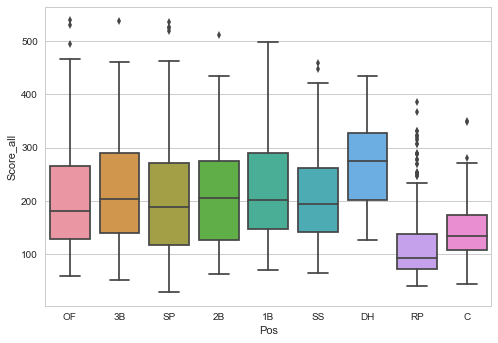

In [676]:
# All players 

df = all_proj_18[all_proj_18.Pos != 0]

_ = sns.boxplot(x='Pos', y='Score_all', data=df)
plt.show()

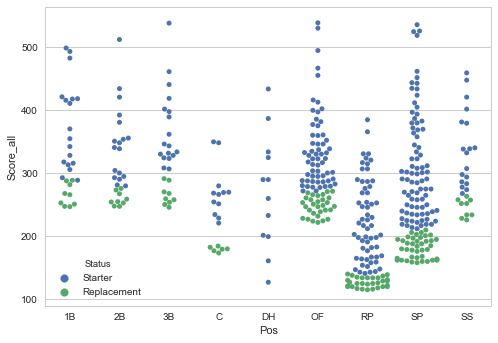

In [710]:
# df of top x players per position

df = all_proj_18[all_proj_18.Pos != 0]
df = df.reset_index().set_index('Pos')
df = df.sort_index()
lin = lineup.set_index('Pos')
lin.loc['SP'] = 7
lin.loc['RP'] = 5

top = pd.DataFrame()
rep = pd.DataFrame()
for pos in df.index.unique():
    end_point = int(12 * lin.loc[pos])
    top_pos = df.loc[pos]
    top_pos = top_pos.sort_values('Score_all', ascending=False)
    top_pos = top_pos[:end_point]
    top = pd.concat([top, top_pos])
    
    end_new = int(end_point * 1.5)
    rep_pos = df.loc[pos]
    rep_pos = rep_pos.sort_values('Score_all', ascending=False)
    rep_pos = rep_pos[end_point:end_new]
    rep = pd.concat([rep, rep_pos])
    
top['Status'] = 'Starter'
rep['Status'] = 'Replacement'
df = pd.concat([top, rep])


_ = sns.swarmplot(x='Pos', y='Score_all', data=df.reset_index(), hue='Status')
plt.show()

# my Team stuff

In [289]:
# List of entire team and scores

view_b = ['Score', 'Score/G','TB', 'BB', 'R', 'RBI', 'SB', 'SO', 'G', 'Pos']
view_p = ['Score', 'Score/G','IP', 'ER', 'W', 'L', 'SV', 'K', 'H', 'BB', 'G', 'GS']

my_team = draft[draft.F_Team == 'Los Angeles Angels o Elster']
my_team_names = my_team.index

#classify SP/RP
def pitcher_pos(df):
    # for each player, if pos = 0, classify pitcher
    pos_array = []
    for player in df.index:
        row = df.loc[player]
        pos = row.Pos
        gs = row.GS
        gp = row.G_p
        if (pos == 0) & (gs + gp > 0):
            if gs/gp > 0.75:
                pos_array.append('SP')
            else:
                pos_array.append('RP')
        else:
            pos_array.append(pos)
    
    return pos_array
        

off_team = fg_2018_df.set_index('Name').loc[my_team_names][view_b].fillna(0)
pit_team = fg_2018_df_p.set_index('Name').loc[my_team_names][view_p].fillna(0)
team = off_team.join(pit_team, how='left', rsuffix='_p')
team['Score_all'] = team.Score + team.Score_p
team['Pos'] = pitcher_pos(team)
team.head()

,Score,Score/G,TB,BB,R,RBI,SB,SO,G,Pos,...,ER,W,L,SV,K,H,BB_p,G_p,GS,Score_all
Name,,,,,,,,,,,,,,,,,,,,,
Andrelton Simmons,335.0,2.161,219.0,38.0,65.0,62.0,13.0,62.0,155.0,SS,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,335.0
Austin Hays,337.0,2.308,272.0,21.0,72.0,88.0,4.0,120.0,146.0,OF,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,337.0
Blake Snell,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SP,...,70.0,10.0,10.0,0.0,174.0,145.0,76.0,29.0,29.0,311.0
Charlie Blackmon,480.0,3.221,328.0,50.0,116.0,86.0,14.0,114.0,149.0,OF,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,480.0
Chris Archer,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SP,...,76.0,12.0,11.0,0.0,222.0,168.0,61.0,32.0,32.0,434.0


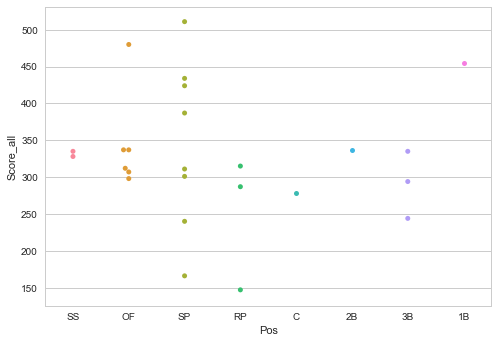

In [421]:
# for annotations, creating dict of positions
pos_dict = {}
for xnum, pos in enumerate(df.Pos.unique()):
    pos_dict[pos] = xnum
    
    
df = team
_ = sns.swarmplot(x='Pos', y='Score_all', data=df)
#for name, pos, score in zip(df.index, df.Pos, df.Score_all):
#    _ = plt.annotate(xy=(pos_dict[pos],score), s=name)

# annotate
#for name, pos, score in zip(df.index, df.Pos, df.Score_all):
    #xnum = pos_dict[pos]
    #plt.annotate(name,xy=(xnum, score), xycoords='data',
    #    xytext=(300, (score - 350)/10), textcoords='offset points',
    #    horizontalalignment="center",
    #    arrowprops=dict(arrowstyle="->",
    #    connectionstyle="arc3"))
    
plt.show()

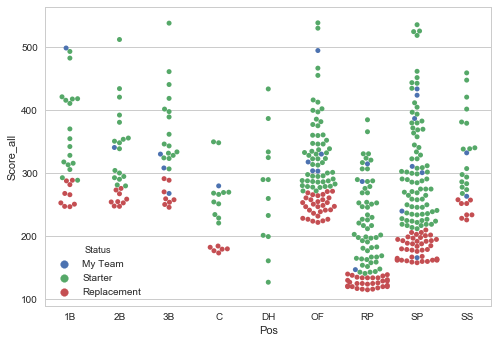

In [748]:
# df of top x players per position plus my team

df = all_proj_18[all_proj_18.Pos != 0]
df = df.reset_index().set_index('Pos')
df = df.sort_index()
lin = lineup.set_index('Pos')
lin.loc['SP'] = 7
lin.loc['RP'] = 5

top = pd.DataFrame()
rep = pd.DataFrame()
for pos in df.index.unique():
    end_point = int(12 * lin.loc[pos])
    top_pos = df.loc[pos]
    top_pos = top_pos.sort_values('Score_all', ascending=False)
    top_pos = top_pos[:end_point]
    top = pd.concat([top, top_pos])
    
    end_new = int(end_point * 1.5)
    rep_pos = df.loc[pos]
    rep_pos = rep_pos.sort_values('Score_all', ascending=False)
    rep_pos = rep_pos[end_point:end_new]
    rep = pd.concat([rep, rep_pos])
    
top['Status'] = 'Starter'
rep['Status'] = 'Replacement'
df = pd.concat([top, rep])

df = df.reset_index().set_index('Name')
for player in my_team_names:
    try:
        df.set_value(index=player, col='Status', value='My Team')
    except KeyError:
        print('not added',player)
        df.loc[player] = {'Pos':all_proj_18.loc[player].Pos, 'All_score': all_proj_18.loc[player].Score, 'Status': 'My Team'
}

_ = sns.swarmplot(x='Pos', y='Score_all', data=df.reset_index(), hue='Status')
plt.show()

In [982]:
#all_proj_18.loc['Austin Hays'].Score
#df.loc['Austin Hays']

In [745]:
# draft results

In [1005]:
# read in draft results, split up club pos into two groups
draft = pd.read_csv('./Data/in_season/draft_results.csv')
draft['Club'] = [(str(x).split(' ')[0]) for x in draft['ClubPos']]
draft['Pos'] = [(str(x).split(' ')[1]) for x in draft['ClubPos']]
del draft['ClubPos']

# have espn name, fantasy team, club, position, and pick
# want to add predicted scoring stats 
# have tgf_fg_proj (roto_names. need to add espn_name, and add scoring stats)

df = master_ref.set_index('espn_name')
df_p = fg_2018_df_p.set_index('Name')[scoring_stats_updated_pitching]
draft = draft.set_index('Name').join(df['fg_name'])
draft.index.name = 'Name'
draft = draft.reset_index().set_index('fg_name')
draft = draft.join(off_proj, lsuffix='_off')

# adding pitching
draft = draft.join(df_p, rsuffix='_p')
draft.index.name = 'fg_name'
#draft['Total_Score'] = (draft['Score'].add(draft['Score_p'], fill_value=0))
del draft['Score']
#del draft['Score_p']
draft.tail().T


fg_name,Yuli Gurriel,Zach Davies,Zack Cozart,Zack Godley,Zack Greinke
Name_off,Yuli Gurriel,Zach Davies,Zack Cozart,Zack Godley,Zack Greinke
Pick,247,262,139,74,39
F_Team,Team Mad Money,Team Ortega,Team Pirate Tuck,Jackmerius Tacktheritrix,The Baddest Froggy Fresh
Club,Hou,Mil,LAA,Ari,Ari
Pos_off,1B,SP,SS,SP,SP
Name,NaN,NaN,NaN,NaN,NaN
TB,NaN,NaN,NaN,NaN,NaN
BB,NaN,NaN,NaN,NaN,NaN
R,NaN,NaN,NaN,NaN,NaN
RBI,NaN,NaN,NaN,NaN,NaN


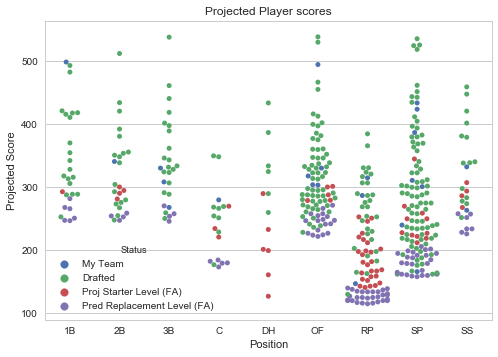

In [852]:
# df of top x players per position plus my team and drafted

df = all_proj_18[all_proj_18.Pos != 0]
df = df.reset_index().set_index('Pos')
df = df.sort_index()
lin = lineup.set_index('Pos')
lin.loc['SP'] = 7
lin.loc['RP'] = 5

top = pd.DataFrame()
rep = pd.DataFrame()
for pos in df.index.unique():
    end_point = int(12 * lin.loc[pos])
    top_pos = df.loc[pos]
    top_pos = top_pos.sort_values('Score_all', ascending=False)
    top_pos = top_pos[:end_point]
    top = pd.concat([top, top_pos])
    
    end_new = int(end_point * 1.5)
    rep_pos = df.loc[pos]
    rep_pos = rep_pos.sort_values('Score_all', ascending=False)
    rep_pos = rep_pos[end_point:end_new]
    rep = pd.concat([rep, rep_pos])
    
top['Status'] = 'Proj Starter Level (FA)'
rep['Status'] = 'Pred Replacement Level (FA)'
df = pd.concat([top, rep])

df = df.reset_index().set_index('Name')

for player in draft.index:
    try:
        df.set_value(index=player, col='Status', value='Drafted')
    except KeyError:
        print('not added',player)
        #df.loc[player] = {'Pos':all_proj_18.loc[player].Pos, 'All_score': all_proj_18.loc[player].Score, 'Status': 'My Team'}
        
for player in my_team_names:
    try:
        df.set_value(index=player, col='Status', value='My Team')
    except KeyError:
        print('not added',player)
        df.loc[player] = {'Pos':all_proj_18.loc[player].Pos, 'All_score': all_proj_18.loc[player].Score, 'Status': 'My Team'
}

# save df as another name 

top_x_pos = df

_ = sns.swarmplot(x='Pos', y='Score_all', data=df.reset_index(), hue='Status')
_ = plt.xlabel('Position')
_ = plt.ylabel('Projected Score')
_ = plt.title('Projected Player scores')
plt.show()

In [773]:
# check on players 
#df.reset_index().set_index('Pos').loc['C'][['Name', 'Status', 'Score_all']]

In [1201]:
# Set replacement level for each position, from two cells above, get team names from draft,
# compare position to replacement production

df = all_proj_18[all_proj_18.Pos != 0]
df = df.reset_index().set_index('Pos')
df = df.sort_index()
lin = lineup.set_index('Pos')
lin.loc['SP'] = 7
lin.loc['RP'] = 5

top = pd.DataFrame()
rep = pd.DataFrame()
for pos in df.index.unique():
    end_point = int(12 * lin.loc[pos])
    top_pos = df.loc[pos]
    top_pos = top_pos.sort_values('Score_all', ascending=False)
    top_pos = top_pos[:end_point]
    top = pd.concat([top, top_pos])
    
    end_new = int(end_point * 1.5)
    rep_pos = df.loc[pos]
    rep_pos = rep_pos.sort_values('Score_all', ascending=False)
    rep_pos = rep_pos[end_point:end_new]
    rep = pd.concat([rep, rep_pos])
    
top['Status'] = 'Proj Starter Level (FA)'
rep['Status'] = 'Pred Replacement Level (FA)'
df = pd.concat([top, rep])

df = df.reset_index().set_index('Name')

for player in draft.index:
    try:
        df.set_value(index=player, col='Status', value='Drafted')
    except KeyError:
        print('not added',player)
        #df.loc[player] = {'Pos':all_proj_18.loc[player].Pos, 'All_score': all_proj_18.loc[player].Score, 'Status': 'My Team'}df = df[df.Status == 'Pred Replacement Level (FA)']

#df = df.groupby('Pos').mean()
#df = df[['Score_all']]

# adding team names
team_array = []
for name in df.index:
    try:
        name = master_ref.set_index('fg_name').loc[name].espn_name
        try:
            if len(draft.loc[name]) < 10: # duplicates - freaking a man
                team_array.append(draft.loc[name].F_Team.iloc[0])
            else:
                team_array.append(draft.loc[name].F_Team)
        except:
            #print('error: ', name)
            team_array.append('FA')
    except:
        #print('KEYERROR: ',name)
        team_array.append('FA')

df['F_Team'] = team_array
df = df[['Pos', 'Score', 'Score_p', 'Score_all', 'F_Team', 'Status']]

# fill in 0s
df = df.fillna(0)

# add in where there are 0s
for name in df[df.Score_all == 0].index:
    '''grab off and pit scores, add in together to df'''
    try:
        try:
            off_score = off_proj.set_index('Name').fillna(0).loc[name].Score
        except:
            off_score = 0
        try:
            pit_score = pitch_proj.fillna(0).loc[name].Score
        except:
            pit_score = 0
        total_score = off_score + pit_score
        
        if total_score > 0: # if it worked
            df = df.set_value(index=name, col='Score', value=off_score)
            df = df.set_value(index=name, col='Score_p', value=pit_score)
            df = df.set_value(index=name, col='Score_all', value=total_score)
            
        else: # cases where name is not working
            fgname = master_ref.set_index('espn_name').loc[name].mlb_name
            try:
                off_score = off_proj.set_index('Name').fillna(0).loc[fgname].Score
            except:
                off_score = 0
            try:
                pit_score = pitch_proj.fillna(0).loc[fgname].Score
            except:
                pit_score = 0
            total_score = off_score + pit_score

            df = df.set_value(index=name, col='Score', value=off_score)
            df = df.set_value(index=name, col='Score_p', value=pit_score)
            df = df.set_value(index=name, col='Score_all', value=total_score)
    except:
        print('error:',name)


# need to fix positoins now too- can do it with draft.Pos_off
for name in df[df.Pos ==0].index:
    df = df.set_value(index=name, col='Pos', value= draft.loc[name].Pos_off)

# manually fixing Jacob Faria, Michael Taylor #hooooray
df = df.set_value(index='Jacob Faria', col='Score_p', value=241.0)
df = df.set_value(index='Jacob Faria', col='Score_all', value=241.0)
df = df.set_value(index='Michael Taylor', col='Pos', value='OF')
df = df.set_value(index='Michael Taylor', col='Score', value=193.0)
df = df.set_value(index='Michael Taylor', col='Score_all', value=193.0)

roster_analysis = df
roster_analysis.head()

# integrity check: 
# len(df[df.Status == 'Drafted']) == len(df[df.F_Team != 'FA'])


error: Michael Taylor


,Pos,Score,Score_p,Score_all,F_Team,Status
Name,,,,,,
Joey Votto,1B,499.0,0.0,499.0,Los Angeles Angels o Elster,Drafted
Anthony Rizzo,1B,493.5,0.0,493.5,Bliss Bliss,Drafted
Paul Goldschmidt,1B,483.0,0.0,483.0,The Baddest Froggy Fresh,Drafted
Carlos Santana,1B,421.5,0.0,421.5,Jackmerius Tacktheritrix,Drafted
Freddie Freeman,1B,418.5,0.0,418.5,Bliss Bliss,Drafted


In [1135]:
#_ = df[df.Score_all == 0].index
#off_proj.set_index('Name').loc[_]

In [1217]:
# create rep level dict
rep_dict = {}

for pos in roster_analysis.Pos.unique():
    df = roster_analysis.reset_index().set_index('Pos')
    df = df.sort_values('Score_all', ascending=False)
    df = df.loc[pos]
    df = df[df.F_Team == 'FA']
    rep = np.median(df.Score_all)
    rep_dict[pos] = rep

In [1218]:
rep_dict

{'1B': 258.5,
 '2B': 270.25,
 '3B': 256.0,
 'C': 183.5,
 'DH': 200.5,
 'OF': 249.0,
 'RP': 140.0,
 'SP': 193.5,
 'SS': 257.5}

In [1247]:
# marking VORP

replacement_df = pd.DataFrame(columns=['Pos', 'Score', 'Team', 'Replacement', 'Value'])
for name in roster_analysis.index:
    '''Put +/- for each player per team above replacement'''
    row = roster_analysis.loc[name]
    pos = row.Pos
    score = row.Score_all
    team = row.F_Team
    rep = rep_dict[pos]
    replacement_df.loc[name] = pos, score, team, rep, score-rep
    
replacement_df = replacement_df.sort_values('Value', ascending=False)

replacement_df.head()

,Pos,Score,Team,Replacement,Value
Corey Kluber,SP,536.0,Jackmerius Tacktheritrix,193.5,342.5
Max Scherzer,SP,526.0,Team Jutila,193.5,332.5
Chris Sale,SP,525.0,Hebrew Hammers,193.5,331.5
Clayton Kershaw,SP,519.0,Team Pirate Tuck,193.5,325.5
Mike Trout,OF,539.0,Team Penner,249.0,290.0


In [1290]:
# batters only
df = replacement_df
df = df[(df.Pos != 'SP') & (df.Pos != 'RP')]
df.groupby('Team').sum().sort_values('Value', ascending=False)

,Score,Replacement,Value
Team,,,
Bliss Bliss,5409.5,3961.75,1447.75
Jackmerius Tacktheritrix,5313.0,3997.75,1315.25
Team Ortega,5283.5,3978.75,1304.75
Team Penner,4490.5,3245.25,1245.25
Team baum,4613.5,3416.75,1196.75
Team Jutila,4668.0,3494.25,1173.75
Los Angeles Angels o Elster,4558.0,3489.25,1068.75
The Baddest Froggy Fresh,4475.5,3426.75,1048.75
Team Pirate Tuck,4453.0,3445.00,1008.00


In [1265]:
# showing top teams by value
replacement_df.groupby('Team').sum().sort_values('Value', ascending=False)

,Score,Replacement,Value
Team,,,
Los Angeles Angels o Elster,8037.5,5457.25,2580.25
Team Penner,7931.5,5353.25,2578.25
Team baum,7724.5,5277.75,2446.75
Team Pirate Tuck,7876.0,5520.00,2356.00
The Baddest Froggy Fresh,7701.5,5448.25,2253.25
Bliss Bliss,7569.5,5328.75,2240.75
Team Ortega,7847.5,5613.25,2234.25
Team Jutila,7799.0,5569.25,2229.75
Hebrew Hammers,7447.0,5360.50,2086.50


In [1284]:
# list of top FAs
replacement_df[(replacement_df.Pos == 'C')& (replacement_df.Team == 'FA')].head()

,Pos,Score,Team,Replacement,Value
Jonathan Lucroy,C,270.0,FA,183.5,86.5
Yasmani Grandal,C,234.5,FA,183.5,51.0
Neftali Soto,C,221.0,FA,183.5,37.5
Travis d'Arnaud,C,184.5,FA,183.5,1.0
Matt Wieters,C,182.5,FA,183.5,-1.0


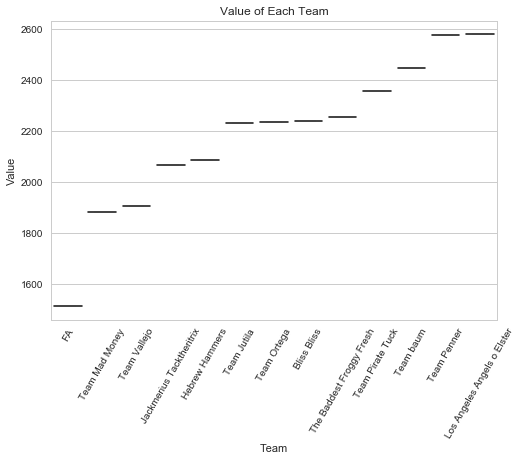

In [1243]:
# visualizing each team value
df = replacement_df.groupby('Team').sum().sort_values('Value').reset_index()
_ = sns.boxplot(x='Team', y='Value', data=df)
_ = plt.xticks(rotation= 60)
_ = plt.title('Value of Each Team')
plt.show()

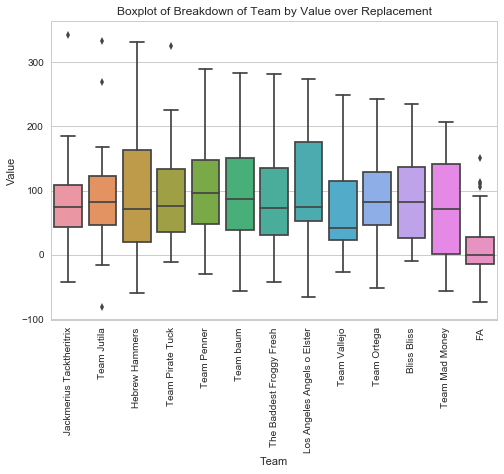

In [1279]:
# swarmplot of dist of each team

df = replacement_df

_ = sns.boxplot(x='Team', y='Value', data=df)
_ = plt.xticks(rotation=90)
_ = plt.title('Boxplot of Breakdown of Team by Value over Replacement')
plt.show()

In [1283]:
df = replacement_df.reset_index()
df = df.groupby(['Team', 'Pos']).sum().sort_values('Value', ascending=False).reset_index()
df[df.Team == 'Los Angeles Angels o Elster']

,Team,Pos,Score,Replacement,Value
0,Los Angeles Angels o Elster,SP,2730.5,1548.00,1182.50
23,Los Angeles Angels o Elster,OF,1935.0,1494.00,441.00
30,Los Angeles Angels o Elster,RP,749.0,420.00,329.00
42,Los Angeles Angels o Elster,1B,499.0,258.50,240.50
61,Los Angeles Angels o Elster,3B,907.0,768.00,139.00
75,Los Angeles Angels o Elster,C,280.0,183.50,96.50
81,Los Angeles Angels o Elster,SS,596.0,515.00,81.00
86,Los Angeles Angels o Elster,2B,341.0,270.25,70.75


In [ ]:
# trying to get the lineup limits

In [1420]:
# Putting in limits for lineup

# grab my team only
df = replacement_df
df = df[df.Team == 'Los Angeles Angels o Elster'].sort_values('Score', ascending= False)

pos_dict = {'RP':0} # add this in now to get around errors
list_players = []


for pos,player in zip(df.Pos,df.index):
    # Corner INF
    if (pos == '1B') | (pos == '3B'): # corner IF
        if pos not in pos_dict: # if 1B/3B not added 
            pos_dict[pos] = 1
            list_players.append([player, pos])
        elif '1B/3B' not in pos_dict: # if no corner inf yet
            pos_dict['1B/3B'] = 1
            list_players.append([player,'1B/3B'])
        elif 'Util/DH' not in pos_dict: # Util
            pos_dict['Util/DH'] = 1
            list_players.append([player,'Util/DH'])
        else:
            print('Bench:',player, pos)
        
    # middle INF        
    elif (pos == '2B') | (pos == 'SS'): # middle IF
        if pos not in pos_dict: # if 2b/ss not added 
            pos_dict[pos] = 1
            list_players.append([player, pos])
        elif '2B/SS' not in pos_dict: # if no corner inf yet
            pos_dict['2B/SS'] = 1
            list_players.append([player,'2B/SS'])
        elif 'Util/DH' not in pos_dict: # Util
            pos_dict['Util/DH'] = 1
            list_players.append([player,'Util/DH'])
        else:
            print('Bench:',player, pos)

            # C
    elif pos == 'C':
        if pos not in pos_dict:
            pos_dict[pos] = 1
            list_players.append([player, pos])
        elif 'Util/DH' not in pos_dict: # Util
            pos_dict['Util/DH'] = 1
            list_players.append([player,'Util/DH'])
        else:
            print('Bench:',player, pos)
    
    # OF
    elif pos == 'OF':
        if pos not in pos_dict: # first of
            pos_dict[pos] = 1
            list_players.append([player, pos])
        elif pos_dict[pos] < 5: # less than 5 OF
            pos_dict[pos] += 1 # increment
            list_players.append([player, pos])
        elif 'Util/DH' not in pos_dict: # Util
            pos_dict['Util/DH'] = 1
            list_players.append([player,'Util/DH'])
        else:
            print('Bench:',player, pos)
        
    # Pitchers
    elif (pos == 'SP') | (pos == 'RP'):
        if pos not in pos_dict: # first P
            pos_dict[pos] = 1
            list_players.append([player, pos])
        elif pos_dict['SP'] + pos_dict['RP'] < 9: # less than 9 P
            pos_dict[pos] += 1 # increment
            list_players.append([player, pos])
        else:
            print('Bench:',player, pos)
            
    else:
        print('POS ERROR:',player, pos)
        
lineup_names = [name[0] for name in list_players]

Bench: Austin Hays OF
Bench: Vince Velasquez SP
Bench: Joakim Soria RP


In [1421]:
lineup_names

['Joey Votto',
 'Charlie Blackmon',
 'Shohei Ohtani',
 'Chris Archer',
 'Jose Quintana',
 'Jeff Samardzija',
 'Joe Panik',
 'Andrelton Simmons',
 'Yasiel Puig',
 'Todd Frazier',
 'Tommy Pham',
 'Felipe Rivero',
 'Blake Snell',
 'Ryan McMahon',
 'Kevin Pillar',
 'David Peralta',
 'Michael Wacha',
 'Jeurys Familia',
 'J.T. Realmuto',
 'Joey Gallo',
 'Ketel Marte',
 'Dylan Bundy']

In [1437]:
# creating function
# Putting in limits for lineup

# grab my team only
def lineup_optimized(team_name):
    '''input team name, grab optimized team from drafted list, create value chart'''
    df = replacement_df
    df = df[df.Team == team_name].sort_values('Score', ascending= False)

    pos_dict = {'RP':0} # add this in now to get around errors
    list_players = []


    for pos,player in zip(df.Pos,df.index):
        # Corner INF
        if (pos == '1B') | (pos == '3B'): # corner IF
            if pos not in pos_dict: # if 1B/3B not added 
                pos_dict[pos] = 1
                list_players.append([player, pos])
            elif '1B/3B' not in pos_dict: # if no corner inf yet
                pos_dict['1B/3B'] = 1
                list_players.append([player,'1B/3B'])
            elif 'Util/DH' not in pos_dict: # Util
                pos_dict['Util/DH'] = 1
                list_players.append([player,'Util/DH'])
            else:
                print('Bench:',player, pos)

        # middle INF        
        elif (pos == '2B') | (pos == 'SS'): # middle IF
            if pos not in pos_dict: # if 2b/ss not added 
                pos_dict[pos] = 1
                list_players.append([player, pos])
            elif '2B/SS' not in pos_dict: # if no corner inf yet
                pos_dict['2B/SS'] = 1
                list_players.append([player,'2B/SS'])
            elif 'Util/DH' not in pos_dict: # Util
                pos_dict['Util/DH'] = 1
                list_players.append([player,'Util/DH'])
            else:
                print('Bench:',player, pos)

                # C
        elif pos == 'C':
            if pos not in pos_dict:
                pos_dict[pos] = 1
                list_players.append([player, pos])
            elif 'Util/DH' not in pos_dict: # Util
                pos_dict['Util/DH'] = 1
                list_players.append([player,'Util/DH'])
            else:
                print('Bench:',player, pos)

        # OF
        elif pos == 'OF':
            if pos not in pos_dict: # first of
                pos_dict[pos] = 1
                list_players.append([player, pos])
            elif pos_dict[pos] < 5: # less than 5 OF
                pos_dict[pos] += 1 # increment
                list_players.append([player, pos])
            elif 'Util/DH' not in pos_dict: # Util
                pos_dict['Util/DH'] = 1
                list_players.append([player,'Util/DH'])
            else:
                print('Bench:',player, pos)

        # Pitchers
        elif (pos == 'SP') | (pos == 'RP'):
            if pos not in pos_dict: # first P
                pos_dict[pos] = 1
                list_players.append([player, pos])
            elif pos_dict['SP'] + pos_dict['RP'] < 9: # less than 9 P
                pos_dict[pos] += 1 # increment
                list_players.append([player, pos])
            else:
                print('Bench:',player, pos)
                
        else:
            if 'Util/DH' not in pos_dict:
                pos_dict['Util/DH'] = 1
                list_players.append([player,'Util/DH'])   
            elif 'Util/DH' in pos_dict:
                print('Bench:',player, pos)
            else:
                print('POS ERROR:',player, pos)

    lineup_names = [name[0] for name in list_players]
    return lineup_names

In [1465]:
df = replacement_df
total_score_df = pd.DataFrame(columns=['Score'])

for name in df.Team.unique():
    '''grab optimized lineup and grab points'''
    temp = lineup_optimized(name)
    team_score = 0
    total_players = 0
    for player in temp:
        team_score += df.loc[player].Score
        total_players += 1
    while (total_players) < 22:
        team_score += total_score/total_players
        total_players += 1
    total_score_df.loc[name] = team_score

Bench: Avisail Garcia OF
Bench: Matt Chapman 3B
Bench: Chris Davis 1B
Bench: Delino DeShields OF
Bench: Steven Souza Jr. OF
Bench: Mike Clevinger SP
Bench: Eduardo Rodriguez SP
Bench: Amed Rosario SS
Bench: Matt Harvey SP
Bench: Jimmy Nelson SP
Bench: Reynaldo Lopez SP
Bench: Zack Cozart 3B
Bench: Stephen Piscotty OF
Bench: Julio Teheran SP
Bench: Alex Cobb SP
Bench: Blake Parker RP
Bench: Tyler Mahle SP
Bench: Lucas Giolito SP
Bench: Maikel Franco 3B
Bench: Mark Trumbo DH
Bench: Cesar Hernandez 2B
Bench: Jake Odorizzi SP
Bench: Tyler Glasnow RP
Bench: Jackie Bradley Jr. OF
Bench: Marwin Gonzalez OF
Bench: Mike Foltynewicz SP
Bench: CC Sabathia SP
Bench: Austin Hays OF
Bench: Vince Velasquez SP
Bench: Joakim Soria RP
Bench: Yoan Moncada 2B
Bench: Aaron Hicks OF
Bench: Tyler Chatwood SP
Bench: Ian Happ OF
Bench: Willie Calhoun OF
Bench: Matt Kemp OF
Bench: Ronald Acuna OF
Bench: Matt Olson 1B
Bench: Justin Bour 1B
Bench: Orlando Arcia SS
Bench: Javier Baez 2B
Bench: Eric Thames 1B
Bench

In [1466]:
total_score_df.sort_values('Score', ascending=False)

,Score
Los Angeles Angels o Elster,7540.500000
Team Penner,7398.500000
Team Jutila,7247.000000
Team Ortega,6902.190476
Team Pirate Tuck,6889.690476
Team Mad Money,6878.000000
Team Vallejo,6869.000000
Hebrew Hammers,6799.190476
The Baddest Froggy Fresh,6748.690476
Bliss Bliss,6684.500000


In [1462]:
lineup_optimized('Team baum')

Bench: Maikel Franco 3B
Bench: Mark Trumbo DH
Bench: Cesar Hernandez 2B
Bench: Jake Odorizzi SP
Bench: Tyler Glasnow RP


['Nolan Arenado',
 'Luis Severino',
 'Edwin Encarnacion',
 'Madison Bumgarner',
 'Elvis Andrus',
 'Whit Merrifield',
 'Ozzie Albies',
 'Evan Longoria',
 'Gerrit Cole',
 'Corey Knebel',
 'Eddie Rosario',
 'Roberto Osuna',
 'Brad Hand',
 'Max Kepler',
 'Shin-Soo Choo',
 'Dinelson Lamet',
 'Arodys Vizcaino',
 'Wilson Ramos',
 'Ervin Santana',
 'Bradley Zimmer']

In [687]:
def espn_to_lahman(espn):
    df = master_ref.set_index('espn_name')
    try:
        return df['fg_name']
    except:
        return ('error')

In [ ]:
''' TB = fantasty_hitters.loc['TB']
    BB = fantasty_hitters.loc['BB']
    R = fantasty_hitters.loc['R']
    RBI = fantasty_hitters.loc['RBI']
    SB = fantasty_hitters.loc['SB']
    SO = fantasty_hitters.loc['SO']
    
    '''

In [220]:
# Holds/saves debate

#roto_pitch['ScoreHLD'] = ((roto_pitch['IP'] * 3) + (roto_pitch['ER'] * -2 ) + (roto_pitch['W'] * 5 ) +(roto_pitch['L'] * -5) +(roto_pitch['SV'] * 5) + (roto_pitch['HLD'] * 3) +(roto_pitch['H'] * 1 )+ (roto_pitch['H'] *-1 ) + (roto_pitch['BB'] * -1))

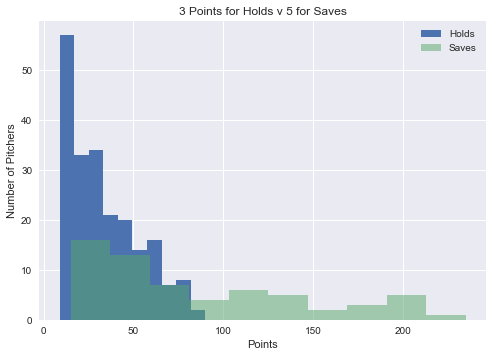

In [31]:
# holds/ saves

_ = plt.hist(3 * roto_pitch[roto_pitch.HLD > 2].HLD)
_ = plt.hist(5 * roto_pitch[roto_pitch.SV > 2].SV, alpha=0.5)
_ = plt.ylabel('Number of Pitchers')
_ = plt.xlabel('Points')
_ = plt.legend(['Holds', 'Saves'])
_ = plt.title('3 Points for Holds v 5 for Saves')
plt.show()

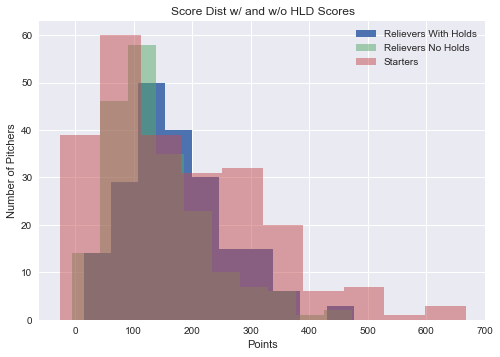

In [32]:
_ = plt.hist(roto_pitch[(roto_pitch.HLD + roto_pitch.SV) > 4].ScoreHLD)
_ = plt.hist(roto_pitch[(roto_pitch.HLD + roto_pitch.SV) > 4].Score, alpha=0.5)
_ = plt.hist(roto_pitch[(roto_pitch.GS) > 4].Score, alpha=0.5)

#_ = plt.hist((fantasy_hitters_2017[fantasy_hitters_2017.Score > 20].Score, alpha=0.3)
_ = plt.ylabel('Number of Pitchers')
_ = plt.xlabel('Points')
_ = plt.legend(['Relievers With Holds', 'Relievers No Holds', 'Starters'])
_ = plt.title('Score Dist w/ and w/o HLD Scores')

plt.show()

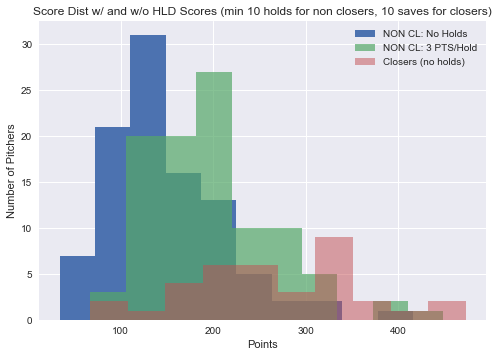

In [33]:
_ = plt.hist(roto_pitch[roto_pitch.HLD > 10].Score)
_ = plt.hist(roto_pitch[roto_pitch.HLD > 10].ScoreHLD, alpha=0.7)
_ = plt.hist(roto_pitch[roto_pitch.SV > 10].Score, alpha=0.5)
#_ = plt.hist(roto_pitch[(roto_pitch.GS) > 10].Score, alpha=0.3)
#_ = plt.hist(roto_pitch[(roto_pitch.HLD) + (roto_pitch.SV) > 10].ScoreHLD, alpha=0.3)

#_ = plt.hist((fantasy_hitters_2017[fantasy_hitters_2017.Score > 20].Score, alpha=0.3)
_ = plt.ylabel('Number of Pitchers')
_ = plt.xlabel('Points')
_ = plt.legend(['NON CL: No Holds', 'NON CL: 3 PTS/Hold', 'Closers (no holds)'])#, 'New Relivers'])
_ = plt.title('Score Dist w/ and w/o HLD Scores (min 10 holds for non closers, 10 saves for closers)')

plt.show()

In [171]:
# 538 coaching

df = pd.read_csv('./coaches_DELETE.csv')
df['Pct_Boss'] = df.W/df.Exp_w
df = df[df.W + df.L > 14]
#df = df[df.School != '—']
df.head()

,Rank,Name,Avg_Seed,School,W,L,Exp_w,Margin,Pct_Boss
0,559,Fran Dunphy,10.6,Temple,3,16,7.1,-4.1,0.422535
1,558,Rick Barnes,6.2,Tennessee,22,23,26.1,-4.1,0.842912
2,557,Jamie Dixon,5.2,Texas Christian,12,12,16.1,-4.1,0.745342
3,556,Norm Stewart,5.9,—,7,10,10.6,-3.6,0.660377
4,555,Lou Henson,5.8,—,9,10,12.5,-3.5,0.720000


In [172]:
df.sort_values('Pct_Boss', ascending=False).set_index('Name')[['Pct_Boss', 'School', 'W','L','Avg_Seed']].reset_index()

,Name,Pct_Boss,School,W,L,Avg_Seed
0,Rollie Massimino,2.340426,—,11,4,9.0
1,Frank Martin,1.612903,South Carolina,10,5,6.6
2,Brad Stevens,1.578947,—,12,5,7.0
3,Dale Brown,1.551724,—,9,9,8.1
4,Thomas Penders,1.463415,—,12,11,9.6
5,Pete Gillen,1.454545,—,8,9,10.4
6,Rick Majerus,1.357143,—,19,12,6.2
7,Larry Brown,1.340206,—,13,4,4.2
8,John Beilein,1.333333,Michigan,20,11,7.4
9,Jim Larranaga,1.323529,Miami (FL),9,9,8.7
